<a href="https://colab.research.google.com/github/Afif-Ghifari/PCVK_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Modul 3 – Operasi Citra Sederhana</h1>
<b>Nama: Muhammad Afif Al Ghifari<br>
Kelas: TI-3H<br>
NIM: 2341720168</b>

<h2>TUGAS PRAKTIKUM D1</h2>


1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

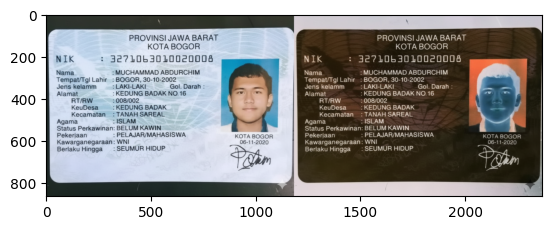

In [14]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt

getImg = cv.imread('/content/KTP_Sample.png')
ktp = cv.cvtColor(getImg, cv.COLOR_BGR2RGB)
invert_ktp = 255 - ktp

ktp_frame = cv.hconcat((ktp, invert_ktp))
plt.imshow(ktp_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

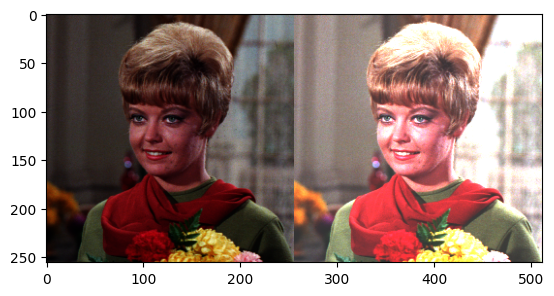

In [34]:
getImg2 = cv.imread('/content/asset pcvk3/female.tiff')
female = cv.cvtColor(getImg2, cv.COLOR_BGR2RGB)
a = 2.0
b = 50

contrast_female = np.clip(a * female + b, 0, 255).astype(np.uint8)

contrast_frame = cv.hconcat((female, contrast_female))
plt.imshow(contrast_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

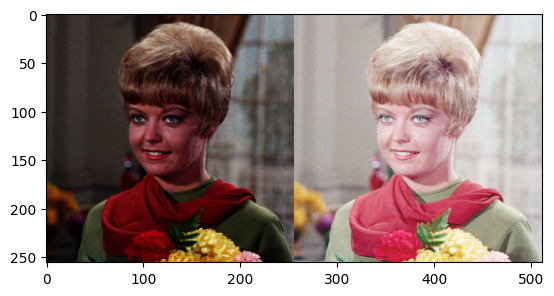

In [31]:
r = female.astype(np.float32)

c = 255 / np.log(1 + np.max(r))

logBright_female = c * np.log(1 + r)

logBright_female = np.clip(logBright_female, 0, 255).astype(np.uint8)

logBright_frame = cv.hconcat((female, logBright_female))
plt.imshow(logBright_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. Averaging

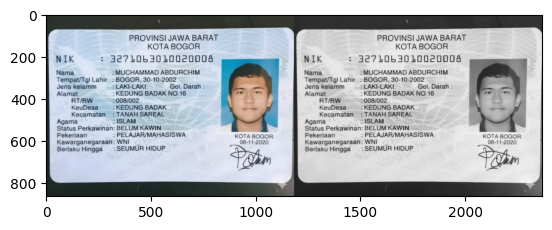

In [46]:
b, g, r = cv.split(ktp)

ktp_avg = ((r.astype(np.float32) + g.astype(np.float32) + b.astype(np.float32)) / 3).astype(np.uint8)

ktp_avg_bgr = cv.cvtColor(ktp_avg, cv.COLOR_GRAY2RGB)

avg_frame = cv.hconcat((ktp, ktp_avg_bgr))
plt.imshow(avg_frame)

b. Lightness

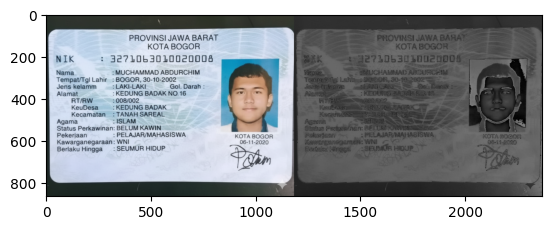

In [49]:
ktp_lightness = ((np.maximum(np.maximum(r, g), b) + np.minimum(np.minimum(r, g), b)) / 2).astype(np.uint8)

ktp_lightness_bgr = cv.cvtColor(ktp_lightness, cv.COLOR_GRAY2RGB)

lightness_frame = cv.hconcat((ktp, ktp_lightness_bgr))
plt.imshow(lightness_frame)

c. Luminance

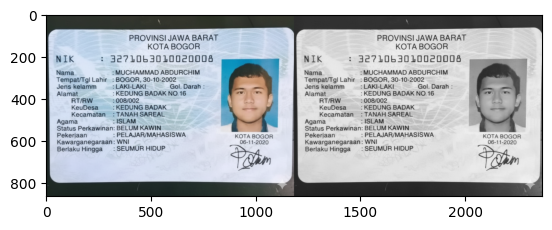

In [45]:
ktp_luminance = (0.21 * r + 0.72 * g + 0.07 * b).astype(np.uint8)

ktp_luminance_bgr = cv.cvtColor(ktp_luminance, cv.COLOR_GRAY2BGR)

luminance_frame = cv.hconcat((ktp, ktp_luminance_bgr))
plt.imshow(luminance_frame)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

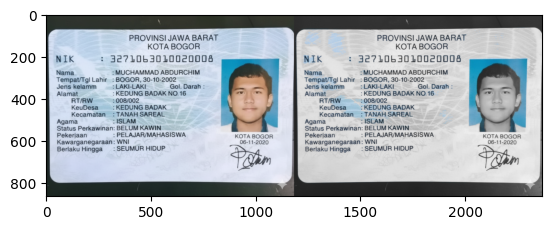

In [51]:
# Konversi ke HSV (lebih mudah deteksi warna)
hsv = cv.cvtColor(ktp, cv.COLOR_RGB2HSV)

# Range warna biru (HSV)
lower_blue = np.array([90, 50, 50])   # batas bawah
upper_blue = np.array([130, 255, 255]) # batas atas

# Buat mask untuk biru
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Buat citra grayscale
gray = cv.cvtColor(ktp, cv.COLOR_RGB2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)  # biar jadi 3 channel

# Gabungkan: biru tetap warna, sisanya grayscale
ktp_result = np.where(mask[:, :, None] != 0, ktp, gray_bgr)

result_frame = cv.hconcat((ktp, ktp_result))
plt.imshow(result_frame)

<h2>D2. Operasi Aritmatika dan Logika</h2>

<h3>1. Buat Gamma Correction sesuai dengan petunjuk berikut</h3>
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


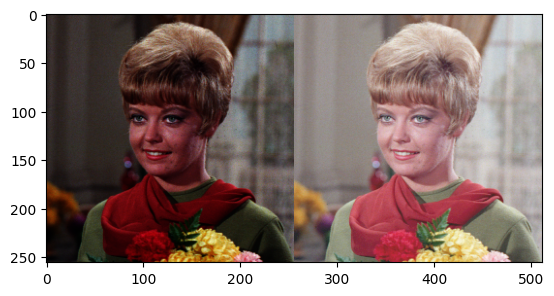

In [57]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')


normalized = female / 255.0

# Terapkan gamma correction sesuai rumus: I' = 255 * (I/255)^(1/gamma)
gamma_corrected = 255 * (normalized ** (1.0 / gamma))

# Pastikan ke rentang [0,255] dan ubah ke uint8
gamma_corrected = np.clip(gamma_corrected, 0, 255).astype(np.uint8)

# Gabungkan untuk perbandingan
gamma_frame = cv.hconcat((female, gamma_corrected))
plt.imshow(gamma_frame)

<h3>2. Buat Simulasi Image Depth</h3>
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi
citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).
Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0
(000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit.
Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

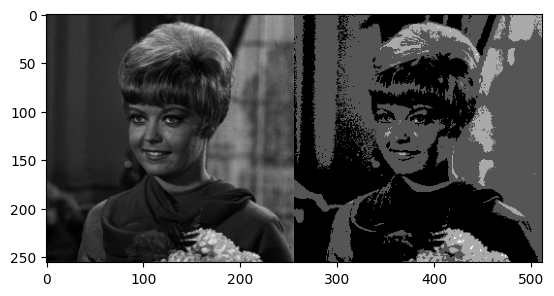

In [62]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread('/content/asset pcvk3/female.tiff', cv.IMREAD_GRAYSCALE)

# Proses kuantisasi
quant = np.round(original / level) * level
quant = np.clip(quant, 0, 255).astype(np.uint8)

quant_frame = cv.hconcat((original, quant))
plt.imshow(quant_frame, cmap='gray')

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.<br>

Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg<br>

Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
menggunakan cv_img[0], cv_img[1], dst.<br>

Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).


```python
  cv_img = []
  for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)
```

<br>
Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan
kesimpulan anda:

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipython-input-2731023864.py:29: RuntimeWarning: invalid value encountered in cast
  avg_img = np.mean(cv_img[:count], axis=0).astype(np.uint8)


TypeError: Invalid shape () for image data

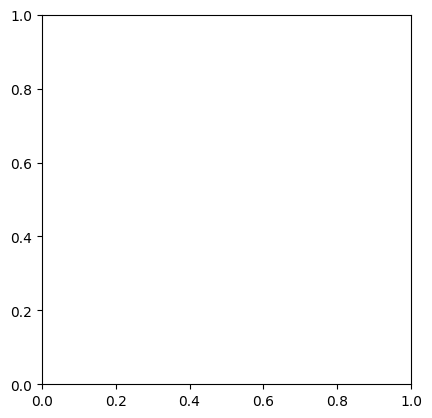

In [63]:
import glob
from math import log10

# Fungsi PSNR
def psnr(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 10 * log10((PIXEL_MAX ** 2) / mse)

# Baca citra asli
original = cv.imread('/content/drive/MyDrive/kuliah/pcvk/asset pcvk/galaxy.jpg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Baca semua citra noisy
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    n = cv.cvtColor(n, cv.COLOR_BGR2RGB)
    cv_img.append(n)

# Jumlah citra untuk diuji
test_counts = [10, 20, 40, 80, 100]
psnr_values = []

for count in test_counts:
    # Average denoising
    avg_img = np.mean(cv_img[:count], axis=0).astype(np.uint8)

    # Hitung PSNR
    value = psnr(original, avg_img)
    psnr_values.append(value)

    # Tampilkan contoh hasil
    if count == 10:  # contoh pertama
        plt.imshow(avg_img)
        plt.title(f"Average dari {count} citra | PSNR: {value:.2f} dB")
        plt.axis("off")
        plt.show()

print("Hasil PSNR:", dict(zip(test_counts, psnr_values)))